In [99]:
import random
import numpy as np

In [100]:
class BitSet:
    def __init__(self,size):
        self.bits = np.full((1,size), False)

    def get(self, index):
        return self.bits[0,index]

    def set(self,index, value):
        self.bits[0,index] = value

    def flip(self,index):
        self.bits[0,index] = not self.bits[0,index]

    def debug(self):
        print(self.bits)

In [101]:
class Chromossome:
    def __init__(self):
        x = random.randint(-15,15)
        y = random.randint(-15,15)

        self.__genes = Chromossome.get_genotype(x,y)

    @staticmethod
    def get_genotype(x,y):
        bits = BitSet(10)

        xy_binary = "{:05b}".format(x) + "{:05b}".format(y)
        for i in range(10):
            bits.set(i,xy_binary[i] == '1')
        return bits

    @staticmethod
    def get_fenotype(genes):
        # xxxxx yyyyyy genótipo
        # 01234 56789  índice
        # 8421S 8421S  S=0 => + S=1 =>-
        x = (8 * genes.get(0) +
            4 * genes.get(1) +
            2 * genes.get(2) +
            1 * genes.get(3))

        if genes.get(4) == 1:
            x *= -1

        y = (8 * genes.get(5) +
            4 * genes.get(6) +
            2 * genes.get(7) +
            1 * genes.get(8))

        if genes.get(9) == 1:
            y *= -1

        return x,y

    def get_genes(self):
        return self.__genes

    def set_genes(self,genes):
        self.__genes = genes

    def to_string(self):
        chr_str = "G = ["
        for i in range(10):
            if i == 5:
                chr_str += " "
            chr_str += "1" if self.__genes.get(i) else "0"

        x,y = Chromossome.get_fenotype(self.__genes)
        chr_str += f"], F = [{x}, {y}]"
        return chr_str

In [102]:
class Problem:

    @staticmethod
    def f(x,y):
        return x**2 + y**2

    @staticmethod
    def g(x,y):
        return 1/(1 + Problem.f(x,y))

    @staticmethod
    def f_chromossome(chromossome):
        genes = chromossome.get_genes()
        x,y = Chromossome.get_fenotype(genes)
        return Problem.f(x,y)
    @staticmethod
    def g_chromossome(chromossome):
        genes = chromossome.get_genes()
        x,y = Chromossome.get_fenotype(genes)
        return Problem.g(x,y)

    @staticmethod
    def f_average(population):
        sum = 0
        for c in population:
            sum += Problem.f_chromossome(c)
        return sum/ len(population)
    @staticmethod
    def g_average(population):
        sum = 0
        for c in population:
            sum += Problem.g_chromossome(c)
        return sum/ len(population)

In [103]:
class GeneticUtils:

    @staticmethod
    def find_best_chromossome(population):
        best_chromossome = None

        for c in population:
            score = Problem.g_chromossome(c)

            if best_chromossome is None or score > Problem.g_chromossome(best_chromossome):
                best_chromossome = c
        return best_chromossome

    @staticmethod
    def find_worst_chromossome(population):
        worst_chromossome = None

        for c in population:
            score = Problem.g_chromossome(c)

            if worst_chromossome is None or score < Problem.g_chromossome(worst_chromossome):
                worst_chromossome = c
        return worst_chromossome

    @staticmethod
    def format_chromossome(chromossome):
        return f"{chromossome.to_string()}, Score = {Problem.g_chromossome(chromossome):.3f}"

In [104]:
class GeneticOperators:

    @staticmethod
    def selections(population):
        parent1 = random.choice(population)
        parent2 = random.choice(population)

        while parent1 is parent2:
            parent1 = random.choice(population)
            parent2 = random.choice(population)

        print(f"1st parent chosen for crossover: {GeneticUtils.format_chromossome(parent1)}")
        print(f"2nd parent chosen for crossover: {GeneticUtils.format_chromossome(parent2)}")

        return parent1,  parent2

    @staticmethod
    def crossover(population, parent1, parent2):
        crossover_point = random.randint(1,9)
        print(f"Crossover will happen at: {crossover_point}")

        parent1_genes = parent1.get_genes()
        parent2_genes = parent2.get_genes()

        child1_genes = BitSet(10)
        child2_genes = BitSet(10)

        for i in range(crossover_point):
            child1_genes.set(i, parent1_genes.get(i))
            child2_genes.set(i, parent2_genes.get(i))

        for i in range(crossover_point, 10):
            child1_genes.set(i, parent2_genes.get(i))
            child2_genes.set(i, parent1_genes.get(i))

        child1 = Chromossome()
        child2 = Chromossome()

        child1.set_genes(child1_genes)
        child2.set_genes(child2_genes)

        print(f"1st child generated: {GeneticUtils.format_chromossome(child1)}")
        print(f"2nd child generated: {GeneticUtils.format_chromossome(child2)}")

        population.append(child1)
        population.append(child2)

    @staticmethod
    def elitism(population):
        for i in range(2):
            worst = GeneticUtils.find_worst_chromossome(population)
            population.remove(worst)
            print(f"Removed worst {i+1} individual: {GeneticUtils.format_chromossome(worst)}")

    @staticmethod
    def mutation(population):
        MUTATIN_POINT = 0.1
        prob = random.uniform(0, 1)

        if prob >= MUTATIN_POINT:
            return

        target = random.choice(population)
        mutation_point = random.randint(0,9)

        print(f"Individual {target.to_string()} will mutate at {mutation_point}")

        genes = target.get_genes()
        genes.flip(mutation_point)
        target.set_genes(genes)

1st parent chosen for crossover: G = [00111 00001], F = [-3, 0], Score = 0.100
2nd parent chosen for crossover: G = [01010 01101], F = [5, -6], Score = 0.016
Crossover will happen at: 2
1st child generated: G = [00010 01101], F = [1, -6], Score = 0.026
2nd child generated: G = [01111 00001], F = [-7, 0], Score = 0.020
Removed worst 1 individual: G = [01110 01100], F = [7, 6], Score = 0.012
Removed worst 2 individual: G = [01111 01010], F = [-7, 5], Score = 0.013
Generation #1 -> AVG population score 0.048


1st parent chosen for crossover: G = [01000 01110], F = [4, 7], Score = 0.015
2nd parent chosen for crossover: G = [00111 00001], F = [-3, 0], Score = 0.100
Crossover will happen at: 6
1st child generated: G = [01000 00001], F = [4, 0], Score = 0.059
2nd child generated: G = [00111 01110], F = [-3, 7], Score = 0.017
Removed worst 1 individual: G = [01000 01110], F = [4, 7], Score = 0.015
Removed worst 2 individual: G = [01010 01101], F = [5, -6], Score = 0.016
Generation #2 -> AVG p

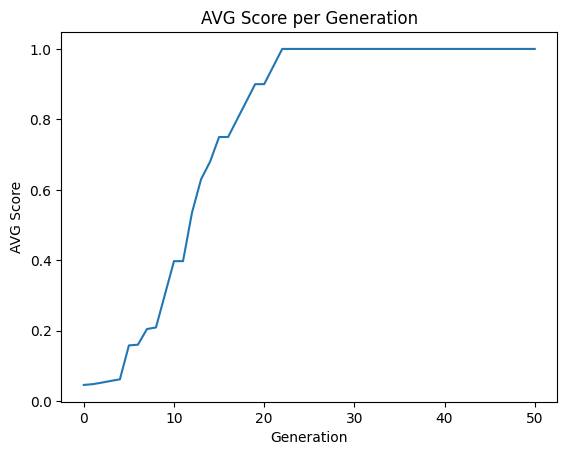

In [105]:
import matplotlib.pyplot as plt

if __name__ == "__main__":

    #Iniial population
    population = []
    for _ in range(10):
        population.append(Chromossome())

    generation = 0
    population_score = Problem.g_average(population)

    #Plot aux vars
    generation_plot = [generation]
    population_score_plot = [population_score]

    #Executing
    while generation < 50:
        parent1, parent2 = GeneticOperators.selections(population)

        GeneticOperators.crossover(population, parent1, parent2)
        GeneticOperators.mutation(population)
        GeneticOperators.elitism(population)

        generation += 1
        population_score = Problem.g_average(population)

        generation_plot.append(generation)
        population_score_plot.append(population_score)

        print(f'Generation #{generation} -> AVG population score {population_score:.3f}\n\n')

    best_chomossome = GeneticUtils.find_best_chromossome(population)
    print(f"Best individual: {GeneticUtils.format_chromossome(best_chomossome)}")

    plt.gca().set_xlabel("Generation")
    plt.gca().set_ylabel("AVG Score")
    plt.gca().set_title("AVG Score per Generation")

    plt.plot(generation_plot, population_score_plot)
    plt.show()